In [38]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Figure 6b

In [39]:
import sys
sys.path.append('/home/links/ct715/eddy_feedback/')
import functions.eddy_feedback as ef
import functions.plotting as plot
import functions.data_wrangling as data 

# SPARC Datasets
ds = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/era_int_TEM_ubar_div1.nc')
ds2 = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/jra55_TEM_ubar_div1.nc')
ds3 = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/ncep_ncar_TEM_ubar_div1.nc')

# Daily JRA55 calculated using aostools
jra = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/jra55_daily/jra55_ubar_ep-both.nc')
jra = jra.sel(level=ds.pressure.values) 

In [40]:
ds 

<xarray.Dataset>
Dimensions:   (time: 456, pressure: 22, latitude: 73)
Coordinates:
  * time      (time) datetime64[ns] 1979-01-14T09:00:00 ... 2016-12-14T09:00:00
  * pressure  (pressure) float32 1e+03 925.0 850.0 700.0 ... 5.0 3.0 2.0 1.0
  * latitude  (latitude) float32 -90.0 -87.5 -85.0 -82.5 ... 82.5 85.0 87.5 90.0
Data variables:
    ubar      (time, pressure, latitude) float32 dask.array<chunksize=(456, 22, 73), meta=np.ndarray>
    div1_pr   (time, pressure, latitude) float32 dask.array<chunksize=(456, 22, 73), meta=np.ndarray>
    div1_qg   (time, pressure, latitude) float32 dask.array<chunksize=(456, 22, 73), meta=np.ndarray>

## Full Primitive Version

In [41]:
r = ef.calculate_efp_latitude(ds, check_variables=True, flip_level=True)
r2 = ef.calculate_efp_latitude(ds2, check_variables=True, flip_level=True)
r3 = ef.calculate_efp_latitude(ds3, check_variables=True, flip_level=True)

r_jra = ef.calculate_efp_latitude(jra, flip_latitude=True, flip_level=True) 

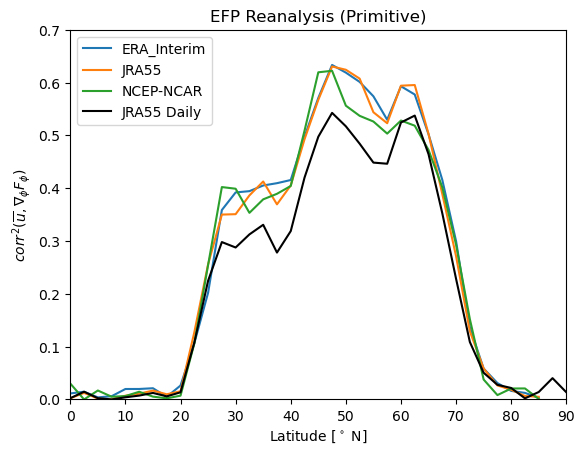

In [42]:
r.plot(label='ERA_Interim')
r2.plot(label='JRA55')
r3.plot(label='NCEP-NCAR') 

r_jra.plot(label='JRA55 Daily', color='k') 

plt.ylim([0, 0.7])
plt.xlim([0,90])

plt.title('EFP Reanalysis (Primitive)')
plt.ylabel('$corr^2(\\overline{u}, \\nabla_{\\phi} F_{\\phi})$')
plt.xlabel('Latitude [$^\\circ$ N]')
plt.legend()
plt.show()

## Quasi-geostrophic Version

In [43]:
r = ef.calculate_efp_latitude(ds, which_div1='div1_qg', check_variables=True, flip_level=True)
r2 = ef.calculate_efp_latitude(ds2, which_div1='div1_qg', check_variables=True, flip_level=True)
r3 = ef.calculate_efp_latitude(ds3, which_div1='div1_qg', check_variables=True, flip_level=True)

r_jra = ef.calculate_efp_latitude(jra, which_div1='div1_qg', flip_level=True, flip_latitude=True)

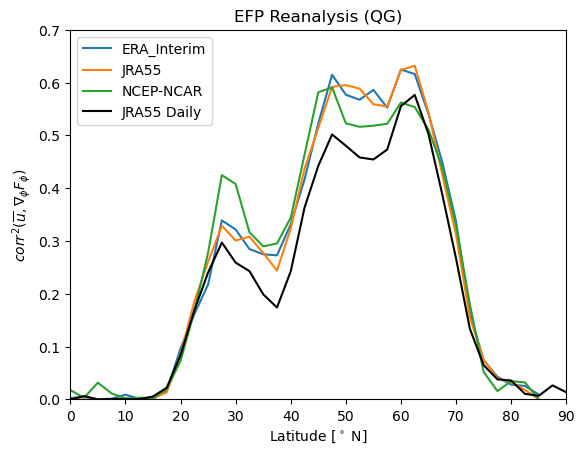

In [44]:
r.plot(label='ERA_Interim')
r2.plot(label='JRA55')
r3.plot(label='NCEP-NCAR') 

r_jra.plot(label='JRA55 Daily', color='k') 

plt.ylim([0, 0.7])
plt.xlim([0,90])

plt.title('EFP Reanalysis (QG)')
plt.ylabel('$corr^2(\\overline{u}, \\nabla_{\\phi} F_{\\phi})$')
plt.xlabel('Latitude [$^\\circ$ N]')
plt.legend()
plt.show()

In [45]:
r3

<xarray.DataArray (lat: 37)>
array([1.78744677e-02, 3.05675775e-03, 3.18236821e-02, 1.13513702e-02,
       1.99817461e-03, 3.14742854e-03, 2.41440616e-03, 2.01809716e-02,
       7.25749166e-02, 1.66739832e-01, 2.77874332e-01, 4.24792313e-01,
       4.08056413e-01, 3.16812728e-01, 2.89899107e-01, 2.95378472e-01,
       3.44217865e-01, 4.63297437e-01, 5.81835939e-01, 5.90865405e-01,
       5.22952890e-01, 5.16341152e-01, 5.18440332e-01, 5.22070757e-01,
       5.62341586e-01, 5.53652690e-01, 5.10912100e-01, 4.38952982e-01,
       3.29044807e-01, 1.80173291e-01, 5.21885473e-02, 1.58850819e-02,
       3.45958273e-02, 3.22366405e-02, 9.63004964e-06,            nan,
                  nan])
Coordinates:
  * lat      (lat) float32 0.0 2.5 5.0 7.5 10.0 ... 80.0 82.5 85.0 87.5 90.0